**Title:**

*Factors Affecting Student Academic Performance*


**Introduction:**


Grades hold significant importance for students as they often serve as the foundation for their future career opportunities and academic pursuits.  Students’ grades can be influenced by multiple factors, such as study habits, motivations, and parent involvements. These factors can be categorized into two primary ones, the family-related variables and individual behavior. This research aims to address the two factors by examining the relationships between student academic performances with specifically their parents’ educational levels and their highschool attendances. 
The dataset used in this project, titled “Student Performance”, is obtained from the UC Irvine Machine Learning Repository.  This dataset was conducted on students attending two secondary schools in Portuguese, featuring data on social and school characteristics. In this project, data about student grades in mathematics and Portuguese languages, absences records, and students’ parents information will be examined and analyzed.  

**Reference:**


Student Performance. (2014). UC Irvine Machine Learning Repository.
[Data set]. https://archive.ics.uci.edu/dataset/320/student+performance

**Methods:**


In order to answer our question of predicting the impact of both absences as well as students’ parents’ education on a student’s academic performance, we will be using the columns: Medu (mother education), Fedu (father education), absences, G1, G2, and G3. The columns Medu, Fedu and absences will be the independent variables (our predictors) and the average of G1, G2 and G3 grades will be the dependent variables.


*Absences:* the number of absences that a student has is a useful predictor for their grades. Students who have a lot of absences often suffer from losing participation marks. We are curious to see if the number of absences strongly impact grades and to what extent. 
*Medu and Fedu*: Parents with higher education levels often emphasize the importance of education and may be more equipped to provide academic support at home, which would in turn improve a students’ grades. 

We plan on using a KNN learning classifier in order to predict our results. The best way to visualize the results that our KNN classifier helps us predict is by using a coloured coded scatter plot. A coloured coded scatter plot would help us quickly be able to classify a new point just visually even without using our model. 


**Expected Outcomes and Significance**

The expected outcome of this study is that if a student may not have had a privileged background (i.e. parents education level is not high or parents job type impacting household income) then they will not perform as well in highschool as compared to other students. It is also helpful if the student has financial help, in order to maximize academic performance. 

The impacts that these findings can have are important because students are deemed as the future of society, and their education therefore, is important for the progression of our communities. By doing well in high school, these students will be able to become stronger students in university, and hence, join career paths, which will allow the progression of our societies. To build a strong foundation in school, family background and support is important for any student. Therefore, by accessing the student’s parent education levels, it can give researchers an idea of how the child’s academic success is impacted due to academic support. This data can also showcase whether children have ideal role models that would support them throughout their academic journey, further impacting their character building skills (such as individual behaviour), that may also impact a student’s absence rate.

From these conclusions, questions can arise concerning children who may not be doing well on an academic basis, and what other support could be offered to these children in order to improve their school performance,  i.e. more tutoring services, lesser class sizes, or counseling sessions when needed.








In [9]:
library(tidyverse)
library(dplyr)
library(readr)
library(tidymodels)
library(repr)
library(rvest)
library(stringr)
library(RColorBrewer)

In [4]:
url <- "https://raw.githubusercontent.com/sweetmidnights/T1-008-DataScienceProject-32/main/student-mat.csv"
dataset <- read_delim(url, delim = ";")
dataset

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,⋯,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,⋯,4,2,2,1,1,1,0,16,18,19


In [11]:
dataset_split <- initial_split(dataset, prop = 0.75) 
dataset_train <- training(dataset_split)
dataset_test <- testing(dataset_split)
dataset_train
dataset_test

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MS,F,17,R,GT3,T,1,2,other,services,⋯,3,2,2,1,2,3,0,12,11,12
GP,F,16,U,GT3,T,2,2,other,other,⋯,5,2,3,1,3,3,0,11,11,11
MS,M,18,U,GT3,T,4,4,teacher,teacher,⋯,3,2,4,1,4,2,4,15,14,14
GP,F,18,U,GT3,T,3,3,services,services,⋯,5,3,4,1,1,4,0,7,0,0
GP,F,17,R,LE3,T,3,1,services,other,⋯,3,1,2,1,1,3,6,18,18,18
GP,F,17,U,GT3,T,4,3,health,services,⋯,4,2,2,1,2,3,0,15,15,15
GP,F,16,R,GT3,T,2,2,services,services,⋯,5,3,5,1,1,5,6,10,10,11
GP,M,15,R,GT3,T,2,3,at_home,services,⋯,4,4,4,1,1,1,2,11,8,8
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,⋯,4,4,4,1,1,3,0,12,12,11
GP,M,15,U,GT3,T,3,4,other,other,⋯,5,5,1,1,1,5,0,14,15,15
GP,M,16,U,LE3,T,4,3,health,other,⋯,3,1,3,1,3,5,4,8,10,10
GP,M,16,U,LE3,T,2,2,other,other,⋯,5,4,4,2,4,5,0,13,13,12
GP,F,15,R,GT3,T,2,4,services,health,⋯,4,3,2,1,1,5,2,10,9,8
GP,M,15,U,GT3,T,4,2,health,services,⋯,2,2,4,2,4,1,4,15,16,15
GP,M,16,U,GT3,T,4,4,teacher,teacher,⋯,4,4,5,5,5,5,16,10,12,11
GP,M,15,U,GT3,T,4,4,services,services,⋯,4,3,1,1,1,5,0,17,16,17


In [12]:
student_performance <- dataset_test |>
              select(absences, Fedu, Medu, G1, G2, G3, school) |>
              mutate(GT = ((G1 + G2 + G3) / 3)* 5) #calculating the average for the data

student_performance                 

absences,Fedu,Medu,G1,G2,G3,school,GT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
10,3,4,15,15,15,GP,75.00000
0,2,2,12,12,11,GP,58.33333
0,4,3,14,15,15,GP,73.33333
4,3,4,8,10,10,GP,46.66667
0,2,2,13,13,12,GP,63.33333
2,4,2,10,9,8,GP,45.00000
4,2,4,15,16,15,GP,76.66667
16,4,4,10,12,11,GP,55.00000
0,4,4,17,16,17,GP,83.33333


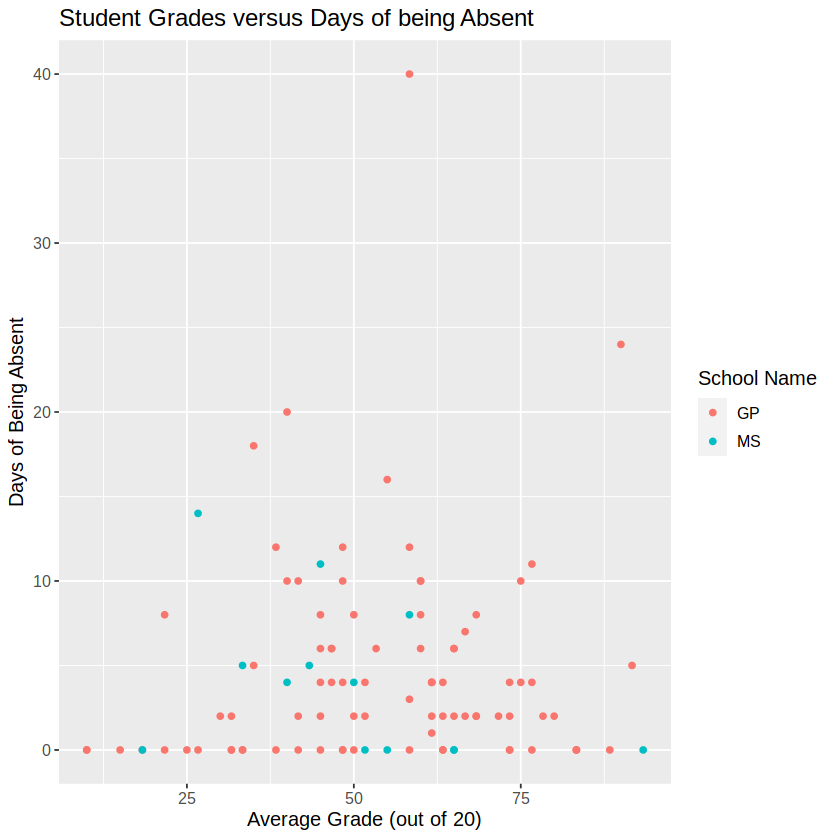

In [16]:
plot_student_performance <- ggplot(student_performance , aes(x = GT, y = absences, color = school)) +
                   geom_point() +
                   xlab("Average Grade (out of 20)") +
                   ylab("Days of Being Absent") + 
                   labs(color = 'School Name') +
                   theme(text = element_text(size = 12))+
                   ggtitle("Student Grades versus Days of being Absent") #title for the plot

plot_student_performance